## RNN 模型
本程序的目的是建立一个RNN模型
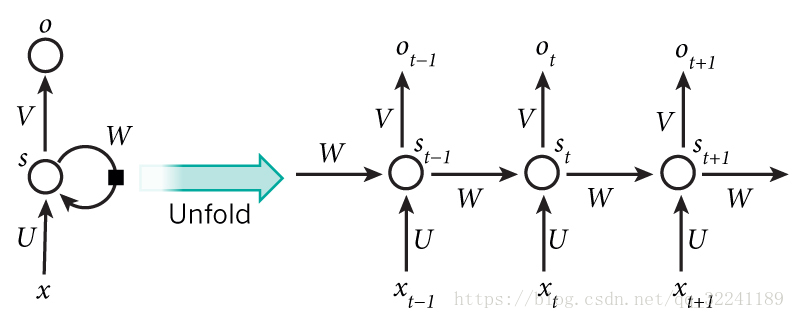

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn


class SeriesPredictor:
    def __init__(self,input_dim, seq_size, hidden_dim = 10):
        self.input_dim = input_dim
        self.seq_size = seq_size
        self.hidden_dim = hidden_dim
        
        self.W_out = tf.Variable(tf.random_normal([hidden_dim,1]), name = 'W_out')
        self.b_out = tf.Variable(tf.random_normal([1]),name = 'b_out')
        
        self.x = tf.placeholder(tf.float32,[None,seq_size,input_dim])
        self.y = tf.placeholder(tf.float32,[None,seq_size])
        
        self.cost = tf.reduce_mean(tf.square(self.model() - self.y))
        self.train_op = tf.train.AdamOptimizer().minimize(self.cost)
        
        self.saver = tf.train.Saver()
    def model(self):
        """
        :param x: inputs of size [T, batch_size, input_size]
        :param W: matrix of fully-connected output layer weights
        :param b: vector of fully-connected output layer biases
        """
        cell = rnn.BasicLSTMCell(self.hidden_dim)
        outputs,states = tf.nn.dynamic_rnn(cell,self.x, dtype = tf.float32)
        num_example = tf.shape(self.x)[0]
        w_repeated = tf.tile(tf.expand_dims(self.W_out,0),[num_example,1,1])
        
        out = tf.matmul(outputs,w_repeated) + self.b_out
        out = tf.squeeze(out)
        return out
    
    def train(self, train_x, train_y):
        with tf.compat.v1.Session() as sess:
            tf.get_variable_scope().reuse_variables()
            sess.run(tf.global_variables_initializer())
            for i in range(1000):
                _,mse = sess.run([self.train_op, self.cost], feed_dict= {self.x:train_x, self.y:train_y})
                if i % 100 == 0:
                    print(i,mse)
            save_path = self.saver.save(sess,'D:/jupter/python_jupter/TensorFlow_test/RNN_model_save/model.ckpt')
            print('Model saved to {}'.format(save_path))
        
    def test(self,test_x):
        with tf.compat.v1.Session() as sess:
            tf.get_variable_scope().reuse_variables()
            self.saver.restore(sess, 'D:/jupter/python_jupter/TensorFlow_test/RNN_model_save/model.ckpt')
            output = sess.run(self.model(), feed_dict = {self.x: test_x})
            print(output)
       



In [2]:
predictor = SeriesPredictor(input_dim = 1 , seq_size = 4, hidden_dim = 10)

train_x = [[[1],[2],[5],[6]],
           [[5],[7],[7],[8]],
           [[3],[4],[5],[7]]]

train_y = [[1,3,7,11],
           [5,12,14,15],
           [3,7,9,12]]
predictor.train(train_x,train_y)
test_x = [[[1],[2],[3],[4]],
         [[4],[5],[6],[7]]]
predictor.test(test_x)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
0 93.08431
100 45.237858
200 20.877882
300 10.036569
400 6.194826
500 4.5668545
600 3.6445332
700 2.8551064
800 2.1599448
900 1.6172689
Model saved to D:/jupter/python_jupter/TensorFlow_test/RNN_model_save/model.ckpt
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from D:/jupter/python_jupter/TensorFlow_test/RNN_model_save/model.ckpt
[[ 0.6584808  2.73126    5.281784   7.213702 ]
 [ 4.1242285  9.107354  11.458513  12.307309 ]]


#### 相关的函数即将更新：
BasicLSTMCell -> tf.keras.layers.LSTMCell
<p>dynamic_rnn -> keras.layers.RNN(cell)

模型的保存于导入：
model.data-00000-of-00001    #.data文件是包含我们训练变量的文件，我们待会将会使用它。

## 时间序列数据的预测
见D:\程序文件\python_spyder\tensorflow\LSTM.py